## Questions 1:

**Data Cleaning & Exploration**

**Scenario**: We've received the `Prime_Content_Usage` table from a new source. Before any in-depth analysis, it's vital to ensure that the data's quality meets Amazon's standards.

a) Identify any missing values in the `Prime_Content_Usage` table.

b) Explore and handle outliers in the `viewDuration` column.

c) Ensure that the `watchDate` column follows a unified date format.

## Solution

### **Hint:**
1. Handle missing values appropriately.
2. Explore and treat outliers in continuous data like `viewDuration`.
3. Ensure data formats are consistent across the dataset, especially for dates.

### Step 1: Identify & Handle Missing Values:

Identify any missing values in the `Prime_Content_Usage` table by using `pandas`:

In [ ]:
import pandas as pd

print(prime_content.isnull().sum())

userID           0
contentID        0
contentType      0
genre           55
viewDuration     0
watchDate        0
dtype: int64


The code will display the number of missing values in each column. Depending on the business rules or domain knowledge, we can decide whether to impute, drop, or take other corrective actions for these missing values.

**These are the strategies to handle missing values in `genre`:**
1. Remove Rows with Missing Values.
2. Fill with a Specific Value or 'Unknown'
3. Use Predictive Techniques like KNN imputer
4. Fill with the Most Frequent Value


Here, we will label them as 'Unknown':

In [ ]:
prime_content['genre'].fillna('Unknown', inplace=True)

Check the missing values again:

In [ ]:
print(prime_content.isnull().sum())

userID          0
contentID       0
contentType     0
genre           0
viewDuration    0
watchDate       0
dtype: int64


### Step 2: Handle Outliers:

To identify outliers in the `viewDuration` column, one common method is to use the IQR (Interquartile Range):

In [ ]:
## Outlier Detection for 'Music' content:
# Filter for Music content
music_data = prime_content[prime_content['contentType'] == 'Music']

# Calculate Q1, Q3, and IQR for Music
Q1_music = music_data['viewDuration'].quantile(0.25)
Q3_music = music_data['viewDuration'].quantile(0.75)
IQR_music = Q3_music - Q1_music

# Define bounds for Music
lower_bound_music = Q1_music - 1.5 * IQR_music
upper_bound_music = Q3_music + 1.5 * IQR_music

# Identify outliers for Music
outliers_music = music_data[(music_data['viewDuration'] < lower_bound_music) | (music_data['viewDuration'] > upper_bound_music)]
print("Outliers in Music Content:")
print(outliers_music)


## Outlier Detection for 'Video' content:
# Filter for Video content
video_data = prime_content[prime_content['contentType'] == 'Video']

# Calculate Q1, Q3, and IQR for Video
Q1_video = video_data['viewDuration'].quantile(0.25)
Q3_video = video_data['viewDuration'].quantile(0.75)
IQR_video = Q3_video - Q1_video

# Define bounds for Video
lower_bound_video = Q1_video - 1.5 * IQR_video
upper_bound_video = Q3_video + 1.5 * IQR_video

# Identify outliers for Video
outliers_video = video_data[(video_data['viewDuration'] < lower_bound_video) | (video_data['viewDuration'] > upper_bound_video)]
print("\nOutliers in Video Content:")
print(outliers_video)

Outliers in Music Content:
     userID  contentID contentType    genre  viewDuration         watchDate
23       24         24       Music      POP     57.038880  11-10-2022 19:36
76       77         77       Music      Pop     32.180126  2022-12-03 19:36
130     131        131       Music     Rock     48.640335  2023-01-26 19:36
197     198        198       Music      Pop     48.785285  03-04-2023 19:36
279     280        280       Music      Pop     38.068768  2023-06-24 19:36
429     430        430       Music  Unknown     54.600379  2023-11-21 19:36
564     565        565       Music      Pop     46.361434  2024-04-04 19:36
577     578        578       Music     Rock     44.336353  17-04-2024 19:36
602     603        603       Music     Jazz     34.515645  2024-05-12 19:36
693     694        694       Music      Pop     31.784147  2024-08-11 19:36
734     735        735       Music  Unknown     36.019531  21-09-2024 19:36
736     737        737       Music  Unknown     32.694365  20

Visualizing outliers using a boxplot for `Music`:

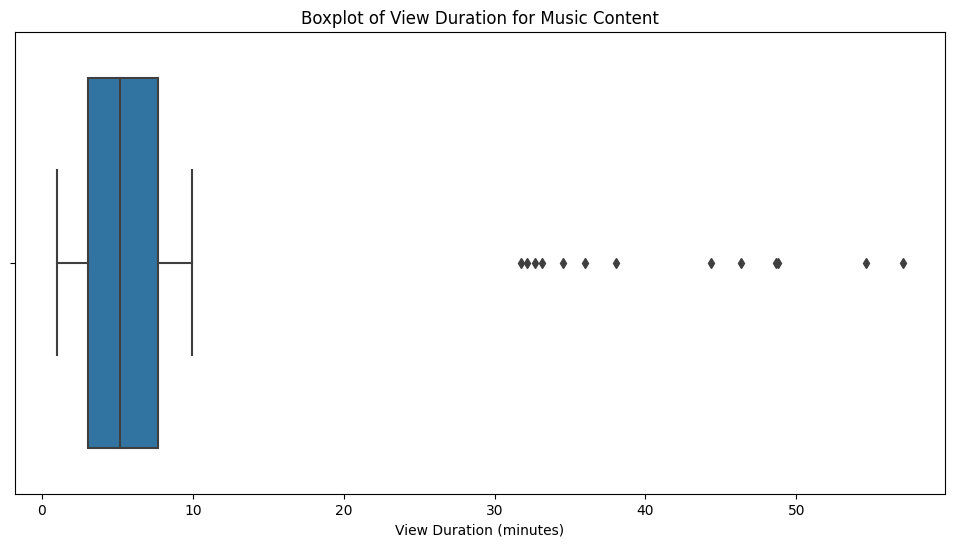

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter for Music content
music_data = prime_content[prime_content['contentType'] == 'Music']

# Plot the viewDuration for Music content
plt.figure(figsize=(12, 6))
sns.boxplot(x=music_data['viewDuration'])

plt.title('Boxplot of View Duration for Music Content')
plt.xlabel('View Duration (minutes)')
plt.show()


Visualizing outliers using a boxplot for `video`:

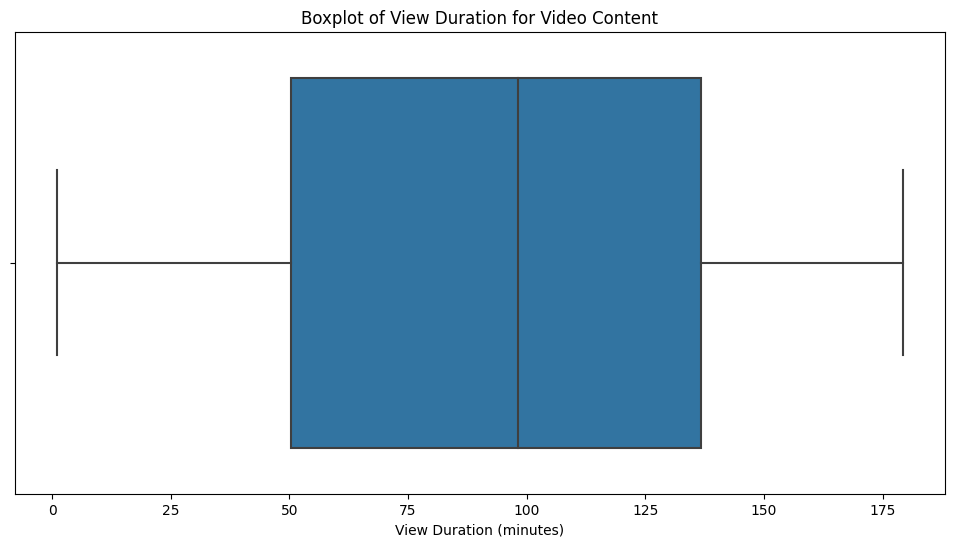

In [ ]:
# Filter for Video content
video_data = prime_content[prime_content['contentType'] == 'Video']

# Plot the viewDuration for Video content
plt.figure(figsize=(12, 6))
sns.boxplot(x=video_data['viewDuration'])

plt.title('Boxplot of View Duration for Video Content')
plt.xlabel('View Duration (minutes)')
plt.show()

Once outliers are identified, we can choose to:
* Remove them.
* Cap values to upper or lower bounds.
* Investigate them further to understand if they represent genuine extreme values or data errors.

Here, we allow outliers to occur if the user listens to music for a long time, so we ignore these outliers

### Step 3: Ensure Consistent Date Format:

Ensure that the `watchDate` column follows a unified date format：

In [ ]:
# Convert the 'watchDate' column to a consistent date format
prime_content['watchDate'] = pd.to_datetime(prime_content['watchDate'], infer_datetime_format=True)

# Verify the changes
print(prime_content['watchDate'].head())

0   2022-09-18 19:36:00
1   2022-09-19 19:36:00
2   2022-09-20 19:36:00
3   2022-09-21 19:36:00
4   2022-09-22 19:36:00
Name: watchDate, dtype: datetime64[ns]


This code will ensure that the `watchDate` column follows the format 'YYYY-MM-DD'. If there are any inconsistencies in the date format in the data, this operation will throw an error, allowing you to further inspect and clean those specific records.

**Comments on the Result**:

After following the steps above:
* We have a clear understanding of missing values in the dataset.
* Outliers in the `viewDuration` column are identified and can be treated accordingly.
* All dates in the `watchDate` column are ensured to be in a unified format.

## Question 2:
**SQL Queries**

**Scenario**: The Amazon Prime executive team is keen on understanding user preferences to curate content better. Using the `Prime_Content_Usage` table:

a) Identify the top 3 most popular genres among users in the last 6 months.

b) For each genre, determine the average `viewDuration`.

c) Using a subquery, find out how many unique users accessed content more than 10 times in the last month.

## Solution

### **Hint:**
1. **Extract Relevant Timeframes**:
    * For a) and b): Consider only the data from the last 6 months.
    * For c): Consider only the data from the last month.

2. **Identify Top Genres**:
    * Group by genres and count the number of users for each genre. Then, sort and limit the result to get the top 3 genres.

3. **Calculate Average View Duration**:
    * For each genre, calculate the average `viewDuration`.

4. **Identify Frequent Users**:
    * Using a subquery, filter out the users who accessed content more than 10 times in the past month.

### Step 1: Convert Pandas DataFrame to SQLite Tables:

In [ ]:
import sqlite3

# Connect to the SQLite database
conn = sqlite3.connect('example.db')
prime_content.to_sql('Prime_Content_Usage', conn, if_exists='replace', index=False)
prime_deliveries.to_sql('Prime_Deliveries', conn, if_exists='replace', index=False)

1000

### Step 2: SQL Queries:

**a) Top 3 genres from the last 6 months:**

In [ ]:
%%sql
SELECT
    genre,
    COUNT(DISTINCT userID) as user_count
FROM
    Prime_Content_Usage
WHERE
    watchDate >= DATE('now', '-6 months')
GROUP BY
    genre
ORDER BY
    user_count DESC
LIMIT 3;

 * sqlite:///example.db
Done.


genre,user_count
Jazz,136
Drama,122
Action,118


**b) Average `viewDuration` for each genre:**

In [ ]:
%%sql
SELECT
    genre,
    AVG(viewDuration) as avg_duration
FROM
    Prime_Content_Usage
WHERE
    watchDate >= DATE('now', '-6 months')
GROUP BY
    genre;

 * sqlite:///example.db
Done.


genre,avg_duration
ACTION,91.38443478277736
Action,92.30938167525622
COMEDY,89.92744538175096
Comedy,97.6036486838469
DRAMA,107.70520649967008
Drama,92.63674143737673
JAZZ,5.816302395628179
Jazz,5.286443501779457
POP,4.343039938953089
Pop,6.374392154346782


**c) Unique users who accessed content more than 10 times in the last month:**

In [ ]:
%%sql
SELECT
    COUNT(DISTINCT userID) as frequent_user_count
FROM
    (
        SELECT
            userID,
            COUNT(contentID) as access_count
        FROM
            Prime_Content_Usage
        WHERE
            watchDate >= DATE('now', '-1 month')
        GROUP BY
            userID
        HAVING
            access_count > 10
    );

 * sqlite:///example.db
Done.


frequent_user_count
0


### **Comments on the Result:**

- The results of query a)  shows that Jazz music and Drama and Action video content are currently trending and in high demand on Amazon Prime.
  
- From query (b), we get insights into the average duration viewers are engaged in content for different genres. A few notable points:

  - `Drama` has two types in the dataset: One with an average duration of approximately 107.71 minutes (presumably movies) and another at 92.64 minutes (potentially TV episodes).
  - `Jazz` music listeners spend, on average, around 5.81 minutes on content.
  - `Action` also has two different representations in the dataset, but their durations are closely matched around 91.5 minutes.

  It's evident that certain genres like Drama tend to have longer view durations, possibly hinting at the depth and engaging nature of such content. On the other hand, music genres like Jazz have shorter average durations, as users might be sampling multiple tracks.

- Query c) showed that there were no users who accessed content more than 10 times in the last month. This is surprising and could indicate a potential data issue or perhaps a more significant trend in user behavior that warrants investigation.


## Question 3:

**Probability and Statistical Analysis**


**Scenario**: Amazon Prime is exploring the likelihood of delivery delays based on historical data to anticipate and mitigate any future challenges.

a) Using the `Prime_Deliveries` table, determine the probability distribution of `delayReason`.

b) Calculate the average delay time when the `delayReason` is "Weather disruptions".

c) Implement the above calculation using a coding language of your choice to obtain the result.

## Solution

### **Hint:**
1. **Data Manipulation & Cleaning**:
    * Check for missing values in `prime_deliveries`.
    * Ensure appropriate data types for each column, especially dates.
    
2. **Probability Distribution of `delayReason`**:
    * Count the occurrences of each delay reason.
    * Compute the probabilities for each reason.

3. **Calculate Average Delay Time for Weather Disruptions**:
    * Filter rows where the `delayReason` is "Weather disruptions".
    * Calculate the difference between `actualDeliveryDate` and `deliveryDate` to get delay in days.
    * Compute the average delay.

4. **Coding Implementation**:
    * Use the pandas library to execute the above steps and obtain results.

### Step 1: Data Manipulation & Cleaning:

In [ ]:
# Checking for missing values in prime_deliveries
print(prime_deliveries.isnull().sum())

# Ensuring date columns are in datetime format
prime_deliveries['orderDate'] = pd.to_datetime(prime_deliveries['orderDate'])
prime_deliveries['deliveryDate'] = pd.to_datetime(prime_deliveries['deliveryDate'])
prime_deliveries['actualDeliveryDate'] = pd.to_datetime(prime_deliveries['actualDeliveryDate'])

orderID                 0
userID                  0
orderDate               0
deliveryDate            0
actualDeliveryDate      0
delayReason           707
dtype: int64


### Step 2: Probability Distribution of `delayReason`:

In [ ]:
# Count occurrences of each delay reason
delay_counts = prime_deliveries['delayReason'].value_counts()

# Calculate probabilities
total_deliveries = len(prime_deliveries)
delay_probabilities = delay_counts / total_deliveries

print(delay_probabilities)

Warehouse delays        0.097
Weather disruptions     0.087
Logistical issues       0.066
Wheather disruptions    0.013
WEATHER DISRUPTIONS     0.011
WAREHOUSE DELAYS        0.009
LOGISTICAL ISSUES       0.007
WHEATHER DISRUPTIONS    0.003
Name: delayReason, dtype: float64


### Step 3: Calculate Average Delay Time for Weather Disruptions:

In [ ]:
# Filter rows for 'Weather disruptions'
weather_delays = prime_deliveries[prime_deliveries['delayReason'] == 'Weather disruptions']

# Calculate delay in days for each row
weather_delays['delayDuration'] = (weather_delays['actualDeliveryDate'] - weather_delays['deliveryDate']).dt.days

# Compute average delay
average_weather_delay = weather_delays['delayDuration'].mean()

print(f"Average delay due to weather disruptions: {average_weather_delay} days")

Average delay due to weather disruptions: 1.471264367816092 days




### Comments on the Result:

- The probability distribution of `delayReason` provides insights into the most common reasons for delivery delays. This can guide Amazon's logistics team in preparing for and mitigating potential issues in the future.
  
- The average delay due to weather disruptions can be crucial for planning. If the average delay is significant, Amazon might consider implementing weather forecast integrations into their logistics planning or communicating potential delays to customers in advance during certain seasons.


## Question 4:

**Product & Business Sense**

**Scenario**: With the insights you've gathered from both the `Prime_Content_Usage` and `Prime_Deliveries` tables:

a) Propose a data-driven strategy to improve content curation for Prime Video and Music.

b) Recommend steps to alleviate common reasons for delivery delays, ensuring expedited shipping for Prime users.

## Solution

### a) Propose a data-driven strategy to improve content curation for Prime Video and Music:

#### **Insights**:

1. **Genre Popularity**: The top 3 genres over the last six months are Jazz, Drama, and Action.
   
2. **User Engagement**: Drama has a higher average view duration, suggesting longer engagement. No users accessed content more than 10 times in the last month, pointing towards an engagement or discovery issue.

#### **Recommendations**:

1. **Focus on Popular Genres**:
   * **Jazz**: Collaborate with famous Jazz musicians to have exclusive tracks or albums released on Amazon Prime first. Organize virtual Jazz events or concerts exclusive to Prime users. This exclusivity can attract more Jazz enthusiasts to the platform.
   * **Drama**: Negotiate contracts for critically acclaimed Drama series or movies from various regions and languages, ensuring a broad and diverse content palette.
   * **Action**: Consider producing original Action content, especially localized in regions where Prime has a significant user base. Exploring genres like regional action-thrillers could provide unique content that competitors might not have.
   
2. **Enhance User Engagement**:
   * **Content Discovery**: Revamp the content discovery algorithm. The home screen should present users with a mix of their preferred genres and new content. Utilize machine learning to anticipate user preferences based on viewing history and other users with similar patterns.
   * **Recommendation System**: Integrate a more responsive recommendation system. After watching a Drama movie, for instance, suggest a popular drama series. Or after listening to a Jazz track, recommend a related album or artist.
   * **User Feedback**: Incorporate a feedback mechanism where users can rate or review content. This feedback can further refine the recommendation system and highlight potential areas of content improvement.

### b) Recommend steps to alleviate common reasons for delivery delays, ensuring expedited shipping for Prime users:

#### **Insights**:

1. **Delay Reasons**: Warehouse delays, weather disruptions, and logistical issues are primary reasons. Also, data inconsistency is observed, indicating a lack of standardization.

2. **Delay Duration**: Weather-related delays average about 1.47 days.

#### **Recommendations**:

1. **Combat Warehouse Delays**:
   * **Inventory Management**: Implement a real-time inventory management system. It will ensure that products are promptly located, packed, and dispatched. Incorporating automation, like robots for fetching products, can also expedite the process.
   * **Predictive Restocking**: Use predictive analytics to anticipate stock requirements based on historical data and trends. This proactive approach can prevent potential out-of-stock situations leading to delays.
   
2. **Mitigate Weather Disruptions**:
   * **Predictive Analysis**: Partner with weather forecasting agencies or integrate platforms like AccuWeather's API. By predicting adverse weather, Amazon can adjust delivery expectations and notify customers in advance.
   * **Alternative Routes**: Develop a dynamic routing system that adjusts delivery routes in real-time based on various factors, including weather conditions.

3. **Address Logistical Issues**:
   * **Delivery Partner Audits**: Regularly evaluate the performance of third-party delivery partners. Poor performers should undergo training or be replaced.
   * **Fleet Modernization**: Upgrade the delivery fleet with newer, fuel-efficient models equipped with GPS and real-time tracking for better route optimization.

4. **Data Standardization**:
   * **Training & Protocols**: Provide training to employees entering delay reasons and enforce strict protocols about data entry. Ensure reasons follow a standardized format.
   * **Automated Data Checks**: Implement data validation scripts that run periodically to identify and correct inconsistencies.